In [1]:
%reset -f

In [2]:
%who

Interactive namespace is empty.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data_1 = pd.read_csv("data/house_price_data_1.csv")
data_2 = pd.read_csv("data/house_price_data_2.csv")
data_3 = pd.read_csv("data/house_price_data_3.csv")
data_4 = pd.read_csv("data/house_price_data_4.csv")
data_5 = pd.read_csv("data/house_price_data_5.csv")
data_6 = pd.read_csv("data/house_price_data_6.csv")
data_7 = pd.read_csv("data/house_price_data_7.csv")

In [5]:
data_1

,Name,URI,Region GSS code,Period,Sales volume,Reporting period,House price index All property types,Pivotable date
0,Barking and Dagenham,http://landregistry.data.gov.uk/id/region/bark...,E09000002,1995-01,96.0,monthly,22.93,01/01/1995
1,Barnet,http://landregistry.data.gov.uk/id/region/barnet,E09000003,1995-01,332.0,monthly,20.22,01/01/1995
2,Bexley,http://landregistry.data.gov.uk/id/region/bexley,E09000004,1995-01,269.0,monthly,24.82,01/01/1995
3,Brent,http://landregistry.data.gov.uk/id/region/brent,E09000005,1995-01,233.0,monthly,16.86,01/01/1995
4,London,http://landregistry.data.gov.uk/id/region/london,E12000007,1995-01,7506.0,monthly,18.48,01/01/1995
...,...,...,...,...,...,...,...,...
1705,Barking and Dagenham,http://landregistry.data.gov.uk/id/region/bark...,E09000002,2023-06,NaN,monthly,157.70,01/06/2023
1706,Barnet,http://landregistry.data.gov.uk/id/region/barnet,E09000003,2023-06,NaN,monthly,124.50,01/06/2023
1707,Bexley,http://landregistry.data.gov.uk/id/region/bexley,E09000004,2023-06,NaN,monthly,151.30,01/06/2023
1708,Brent,http://landregistry.data.gov.uk/id/region/brent,E09000005,2023-06,NaN,monthly,128.00,01/06/2023


In [6]:
df = pd.concat([data_1,data_2,data_3,data_4,data_5,data_6,data_7], axis=0)
df.rename(columns={'Pivotable date': 'Date'}, inplace=True)
df.rename(columns={'House price index All property types': 'HPI'}, inplace=True)
df.rename(columns={'Name': 'Borough'}, inplace=True)



In [7]:
df = df[["Borough", "Date", "HPI"]]
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


In [8]:
print(type(df))
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
Borough            object
Date       datetime64[ns]
HPI               float64
dtype: object


In [9]:
df

,Borough,Date,HPI
0,Barking and Dagenham,1995-01-01,22.93
1,Barnet,1995-01-01,20.22
2,Bexley,1995-01-01,24.82
3,Brent,1995-01-01,16.86
4,London,1995-01-01,18.48
...,...,...,...
1021,Waltham Forest,2023-05-01,148.50
1022,Wandsworth,2023-05-01,112.30
1023,City of Westminster,2023-06-01,102.00
1024,Waltham Forest,2023-06-01,149.50


In [10]:
london = df[df['Borough'] == "London"]


In [11]:
london

,Borough,Date,HPI
4,London,1995-01-01,18.48
9,London,1995-02-01,18.07
14,London,1995-03-01,18.34
19,London,1995-04-01,18.48
24,London,1995-05-01,18.72
...,...,...,...
1689,London,2023-02-01,131.50
1694,London,2023-03-01,129.40
1699,London,2023-04-01,131.90
1704,London,2023-05-01,130.40


In [12]:
london.shape

(342, 3)

In [13]:
boroughs1 = df[df['Borough'].isin(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'London',
       'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich'])]

boroughs2 = df[df['Borough'].isin(['Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth'])]

boroughs3 = df[df['Borough'].isin(['Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'City of Westminster', 'Waltham Forest', 'Wandsworth'])]



In [14]:
%matplotlib notebook


In [15]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('nbagg')
%matplotlib inline

In [16]:
x = london["Date"]
y = london["HPI"]


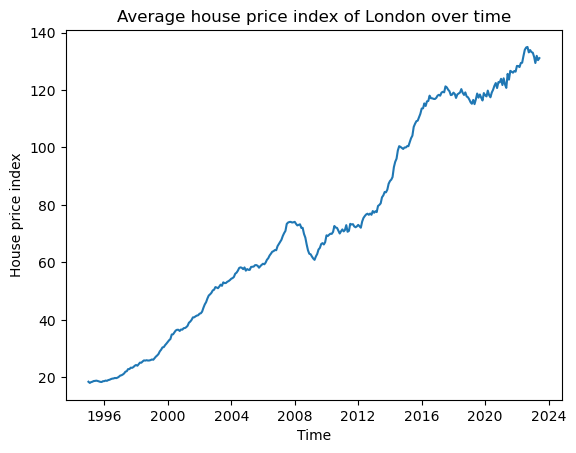

In [17]:

plt.plot(x,y)
plt.title("Average house price index of London over time")
plt.xlabel("Time")
plt.ylabel("House price index")
plt.show()

In [18]:
df['Borough'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'London',
       'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich',
       'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'City of Westminster', 'Waltham Forest', 'Wandsworth'],
      dtype=object)

In [19]:

# Create a dictionary to map boroughs to unique colors
borough_colors = {
    'Barking and Dagenham':'red', 
    'Barnet':'orange',
    'Bexley':'yellow', 
    'Brent':'green', 
    'London':'blue',
    'Bromley':'pink', 
    'Camden':'purple', 
    'Croydon':'brown', 
    'Ealing':'cyan', 
    'Enfield':'magenta', 
    'Greenwich':'lime',
    'Hackney':'gold', 
    'Hammersmith and Fulham':'teal',
    'Haringey':'maroon',
    'Harrow':'navy',
    'Havering':'indigo', 
    'Hillingdon':'salmon',
    'Hounslow':'olive', 
    'Islington':'peru',
    'Kensington and Chelsea':'lavender',
    'Kingston upon Thames':'crimson', 
    'Lambeth':'violet',
    'Lewisham':'aqua', 
    'Merton':'limegreen', 
    'Newham':'rosybrown', 
    'Redbridge':'plum',
    'Richmond upon Thames':'lime',
    'Southwark':'tomato', 
    'Sutton':'chocolate', 
    'Tower Hamlets':'orchid',
    'City of Westminster':'deeppink', 
    'Waltham Forest':'gold', 
    'Wandsworth':'turquoise'
}


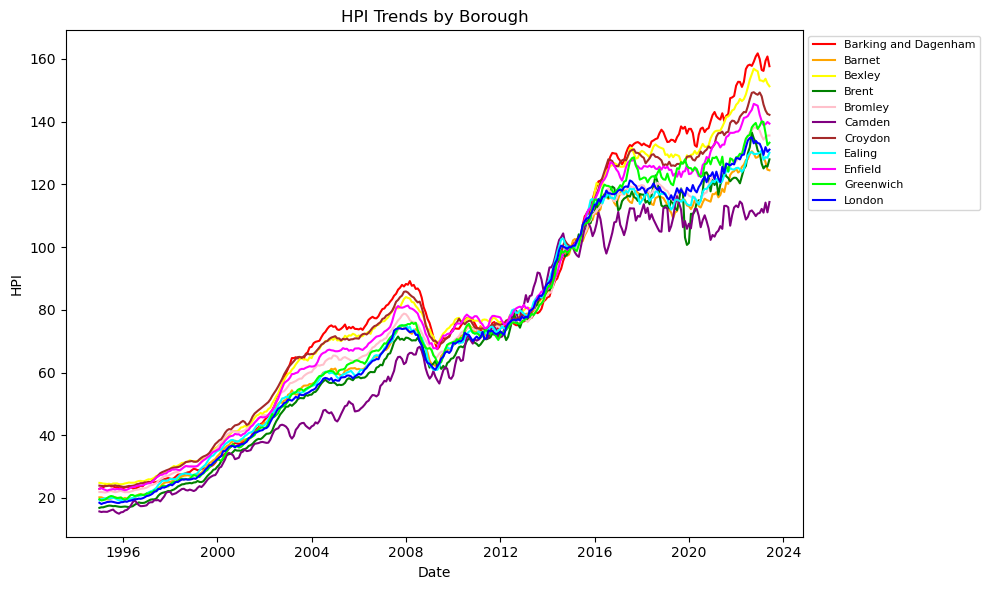

In [20]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
# Iterate through each unique borough in the DataFrame
for borough, group in boroughs1.groupby('Borough'):
    ax.plot(group['Date'], group['HPI'], label=borough, color=borough_colors[borough])

# Customize the plot
plt.xlabel('Date')
plt.ylabel('HPI')
plt.title('HPI Trends by Borough')
plt.legend()



# Rotate x-axis labels if needed
#plt.xticks(rotation=45)

# Make the legend horizontal and smaller
legend = plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})






# Show the plot
plt.tight_layout()
plt.show()

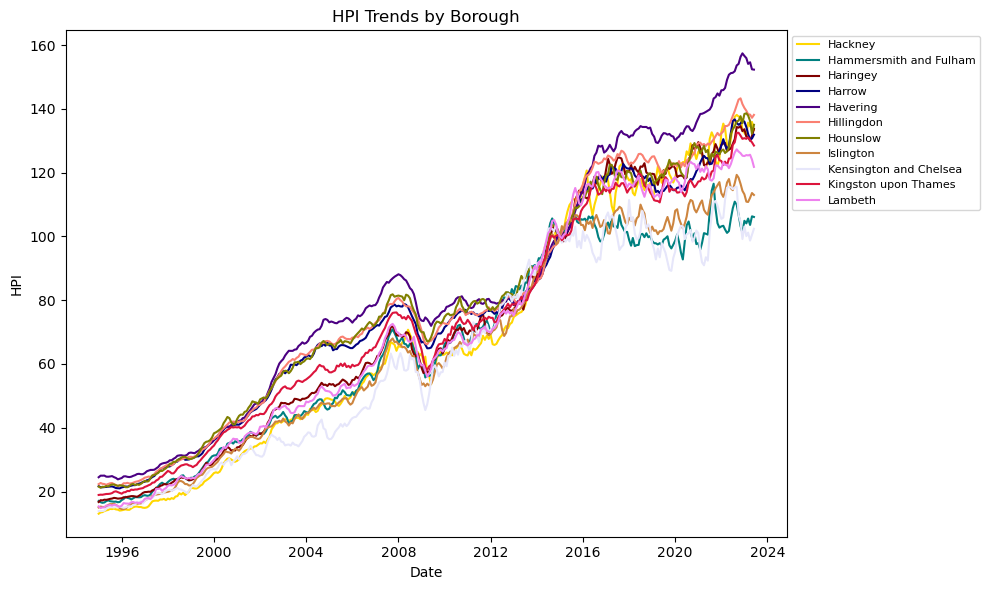

In [21]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each unique borough in the DataFrame
for borough, group in boroughs2.groupby('Borough'):
    ax.plot(group['Date'], group['HPI'], label=borough, color=borough_colors[borough])

# Customize the plot
plt.xlabel('Date')
plt.ylabel('HPI')
plt.title('HPI Trends by Borough')
plt.legend()



# Rotate x-axis labels if needed
#plt.xticks(rotation=45)

# Make the legend horizontal and smaller
legend = plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})






# Show the plot
plt.tight_layout()
plt.show()

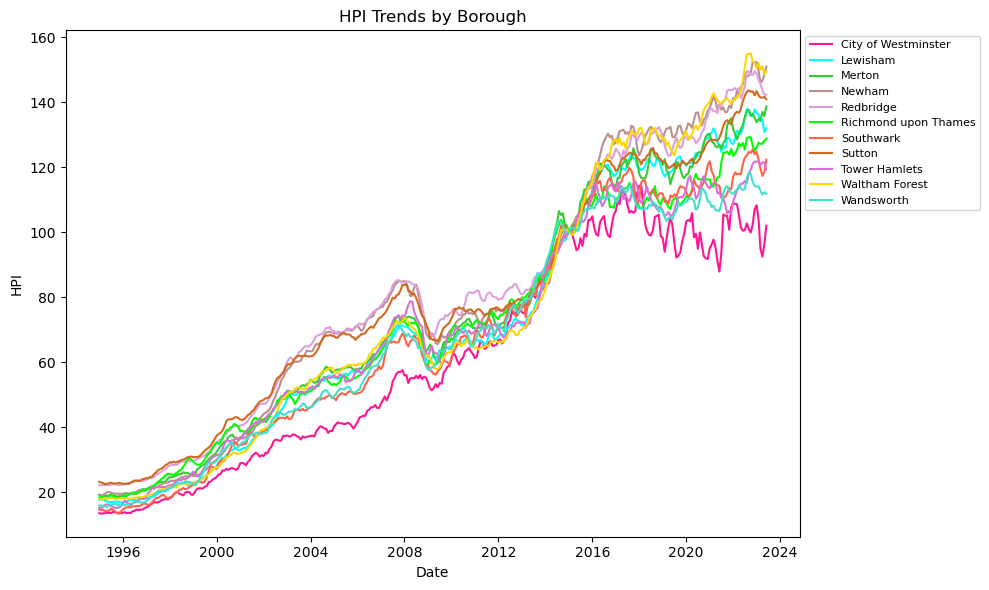

In [22]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each unique borough in the DataFrame
for borough, group in boroughs3.groupby('Borough'):
    ax.plot(group['Date'], group['HPI'], label=borough, color=borough_colors[borough])

# Customize the plot
plt.xlabel('Date')
plt.ylabel('HPI')
plt.title('HPI Trends by Borough')
plt.legend()



# Rotate x-axis labels if needed
#plt.xticks(rotation=45)

# Make the legend horizontal and smaller
legend = plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})






# Show the plot
plt.tight_layout()
plt.show()

In [23]:
# Now want to make a bar chart of change in house price for each borough

In [24]:
hpi_1995 = df[df["Date"] == "1995-01-01"]
hpi_2023 = df[df["Date"] == "2023-6-01"]

print(hpi_1995.shape)
print(hpi_2023.shape)

(33, 3)
(33, 3)


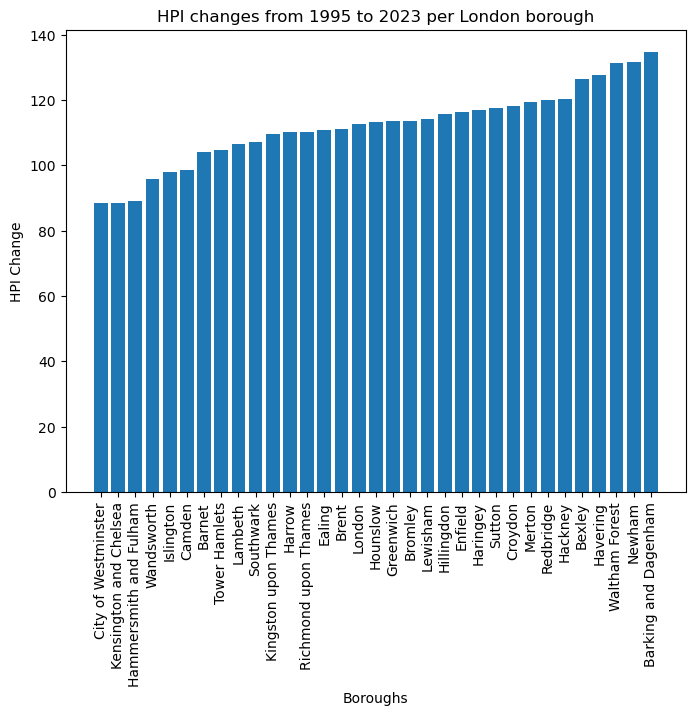

In [25]:
# Bar chart of changes in HPI per borough
hpi_changes = pd.merge(hpi_1995,hpi_2023, on="Borough")
hpi_changes["HPI Change"] = hpi_changes["HPI_y"] - hpi_changes["HPI_x"]
hpi_changes = hpi_changes.sort_values(by='HPI Change')


# Create a bar plot
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.bar(hpi_changes['Borough'], hpi_changes['HPI Change'])
plt.xticks(rotation=90)  # Adjust the angle as needed

# Add labels and title
plt.xlabel('Boroughs')
plt.ylabel('HPI Change')
plt.title('HPI changes from 1995 to 2023 per London borough')

# Show the plot
plt.show()


In [26]:
# Correlation heatmap

# Calculate the correlation matrix
pivoted_df = df.pivot(index='Date', columns='Borough', values='HPI')
correlation_matrix = pivoted_df.corr()


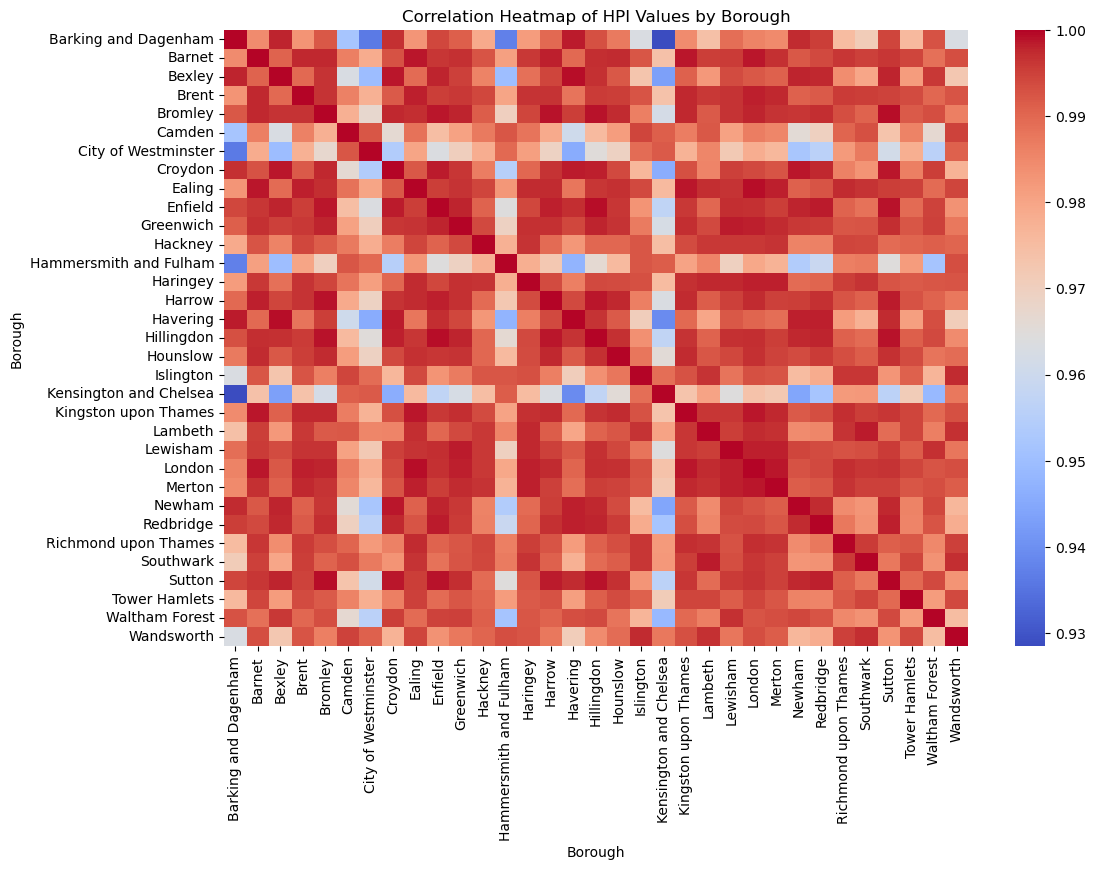

In [27]:
# Create a correlation heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of HPI Values by Borough")
plt.show()

In [63]:
hpi_data = {
    'Borough1': {
        'Date1': 123,
        'Date2': 456,
        'Date3': 789,
    },
    'Borough2': {
        'Date1': 234,
        'Date2': 567,
        'Date3': 890,
    },
    # Add data for other boroughs...
}

In [72]:
hpi_changes

,Borough,Date_x,HPI_x,Date_y,HPI_y,HPI Change
30,City of Westminster,1995-01-01,13.62,2023-06-01,102.0,88.38
19,Kensington and Chelsea,1995-01-01,13.91,2023-06-01,102.4,88.49
12,Hammersmith and Fulham,1995-01-01,17.05,2023-06-01,106.1,89.05
32,Wandsworth,1995-01-01,15.99,2023-06-01,111.8,95.81
18,Islington,1995-01-01,15.01,2023-06-01,113.0,97.99
6,Camden,1995-01-01,15.71,2023-06-01,114.4,98.69
1,Barnet,1995-01-01,20.22,2023-06-01,124.5,104.28
29,Tower Hamlets,1995-01-01,14.70,2023-06-01,119.3,104.60
21,Lambeth,1995-01-01,15.36,2023-06-01,121.8,106.44
27,Southwark,1995-01-01,15.18,2023-06-01,122.3,107.12


In [73]:
import folium

# Sample data with HPI values for different dates


# Create a basic map centered at a specific location
m = folium.Map(location=[51.48, -0.1279], zoom_start=10.5)

# Add markers for each borough and display HPI data for different dates in the popup
for Borough, Date_x in hpi_changes.items():
    popup_content = f'<strong>{borough}</strong><br>'
    for date, hpi_value in date_data.items():
        popup_content += f'{date}: HPI {hpi_value}<br>'
    folium.Marker(
        location=[51.5074, -0.1278],  # Replace with the actual coordinates
        popup=popup_content,
        icon=folium.Icon(icon='cloud')
    ).add_to(m)

# Display the map
#m.save('interactive_hpi_map.html')


In [74]:
m

In [62]:
hpi_data


{'Borough1': {'Date1': 123, 'Date2': 456, 'Date3': 789},
 'Borough2': {'Date1': 234, 'Date2': 567, 'Date3': 890}}

In [29]:
# Ideas:
# Plot against wages or other variables 
# Graphs for inner london vs outer london